1. Project Name: Diabetes Prediction
Team: Preethi Narayanan
Red ID: 822057321    

2. Project Description: 
This project predicts if a person in the dataset has diabetes or not based on their bmi , age, no of pregnancies they had, past medical history, insulin, glucose. Various machine learning models like logistic regression, decision trees, random forest, knn, svc, gaussian nb, gradient boosting, neural networks in python. Different models gave varying results on the test data. 
However, logistic regression , knn, decision trees in python seemed to perform better than other models to predict diabetes. 
Logistic regression in pyspark was attempted. It gave an accuracy of 84.2% on test data.
The same spark code was tried on amazon aws. Results and cli export have been attached. 


3. Special instructions to run project: No special instructions required. Please use the dataset attached in the folder to run the code.

4.libraries used:
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
pip install sklearn
pip install keras
pip install tensorflow

pip install pyspark

importing functions

from pyspark.sql.functions import when
from pyspark.ml.feature import Imputer


5. Feature not working : attempted different ways of modelling the same data after scaling features. So obtained different types of results. The percentage of accuracy is different for different procedures. Its just the method of modelling is different. Attempted to build a model with around 90% accuracy. Decision tree gave a 100% accuracy after scaling predictors. It is probably overfitting. Most of the models gave an accuracy of around 70-90%. Since, it was a small dataset simple models like logistic regression, lda, knn worked well. Usually its the case, simple models perform well than complicated neural networks. 


6. Dataset included in the zip file. Please use it to run the script. 

This dataset diabetes.csv was taken from kaggle.com. The goal is to build machine learning model to predict if the person in the dataset have diabetes or not. The patients here are females over 21 years old of pima indian heritage. The original dataset was from National Institute of Diabetes and Digestive and Kidney Diseases. 

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking for missing data

In [67]:
print(diabetes)
diabetes.isnull().any()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
5              5      116             74             23     30.5  25.6   
6              3       78             50             32     88.0  31.0   
7             10      115             72             23     30.5  35.3   
8              2      197             70             45    543.0  30.5   
9              8      125             96             23     30.5  32.0   
10             4      110             92             23     30.5  37.6   
11            10      168             74             23     30.5  38.0   
12            10      139             

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Exploratory analysis with dataset

In [4]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


correlation between predictors

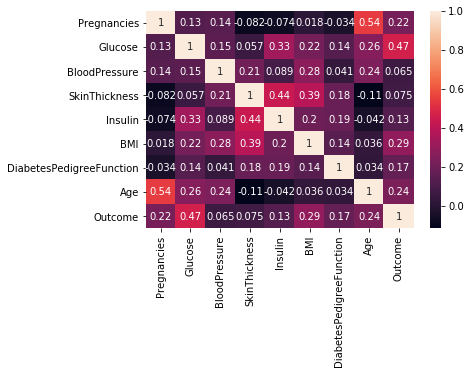

In [5]:
%matplotlib inline
sns.heatmap(corr, annot=True)

plotting histogram

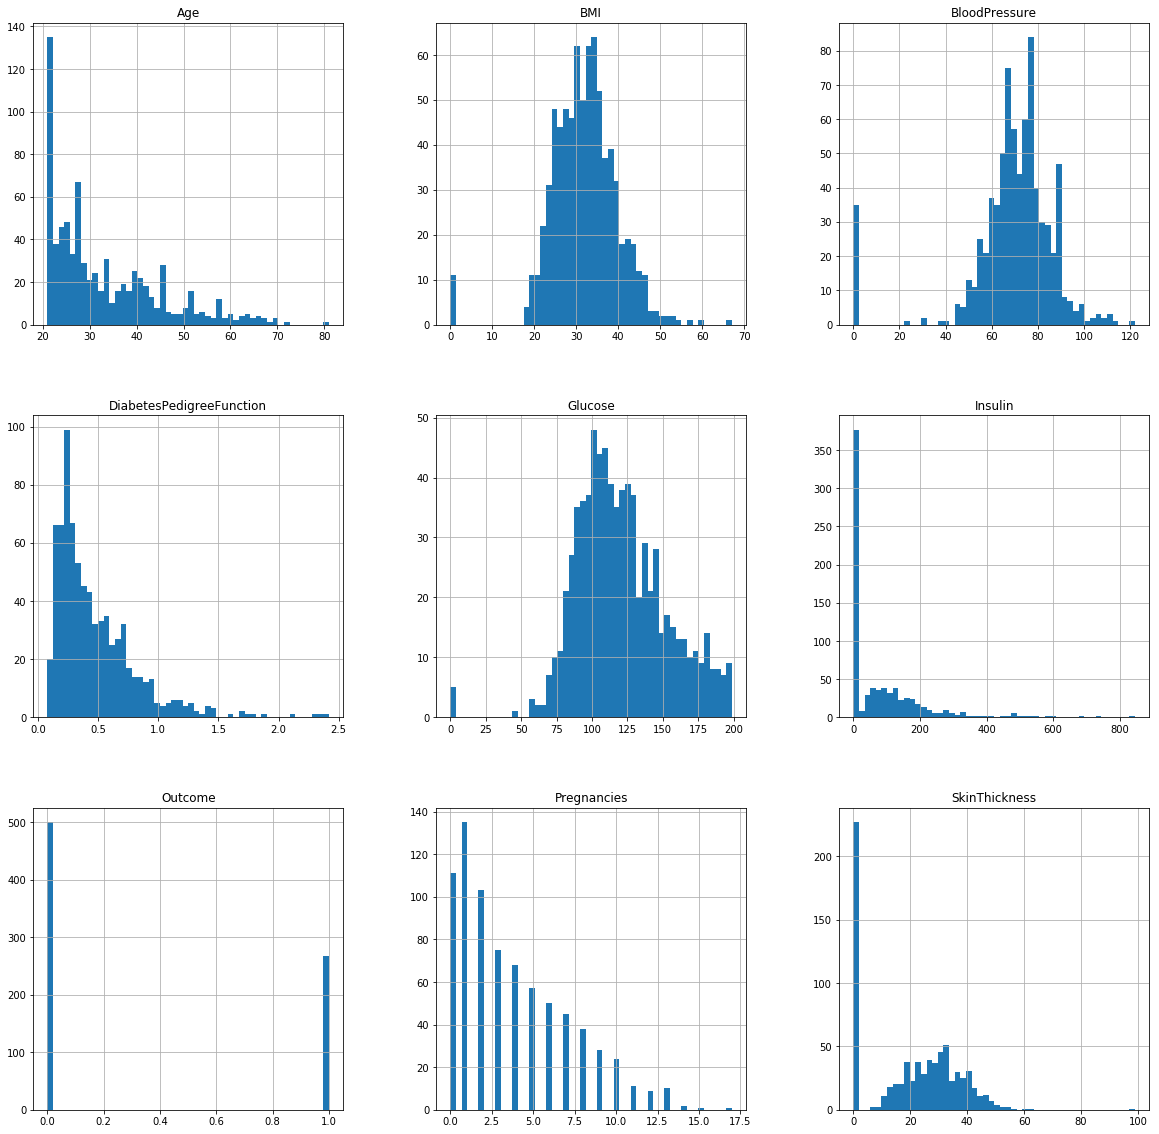

In [6]:
diabetes.hist(bins = 50, figsize = (20,20))
plt.show()

There are some null/zero values for BMI or blood pressure which is not possible to have. Some tranformation will be done.

Data cleaning and transformation

Eliminate null values with median of that column

In [3]:
bmi_median = diabetes['BMI'].median()
diabetes['BMI'] = diabetes['BMI'].replace(to_replace = 0, value = bmi_median)

In [4]:
bloodp_median = diabetes['BloodPressure'].median()
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(to_replace = 0, value = bloodp_median)

In [5]:
glucose_median = diabetes['Glucose'].median()
diabetes['Glucose'] = diabetes['Glucose'].replace(to_replace = 0, value = glucose_median)

In [6]:
skinthickness_median = diabetes['SkinThickness'].median()
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(to_replace = 0, value = skinthickness_median)

In [7]:
insulin_median = diabetes['Insulin'].median()
diabetes['Insulin'] = diabetes['Insulin'].replace(to_replace = 0, value = insulin_median)


Plotting again after replacing 0 values with median 

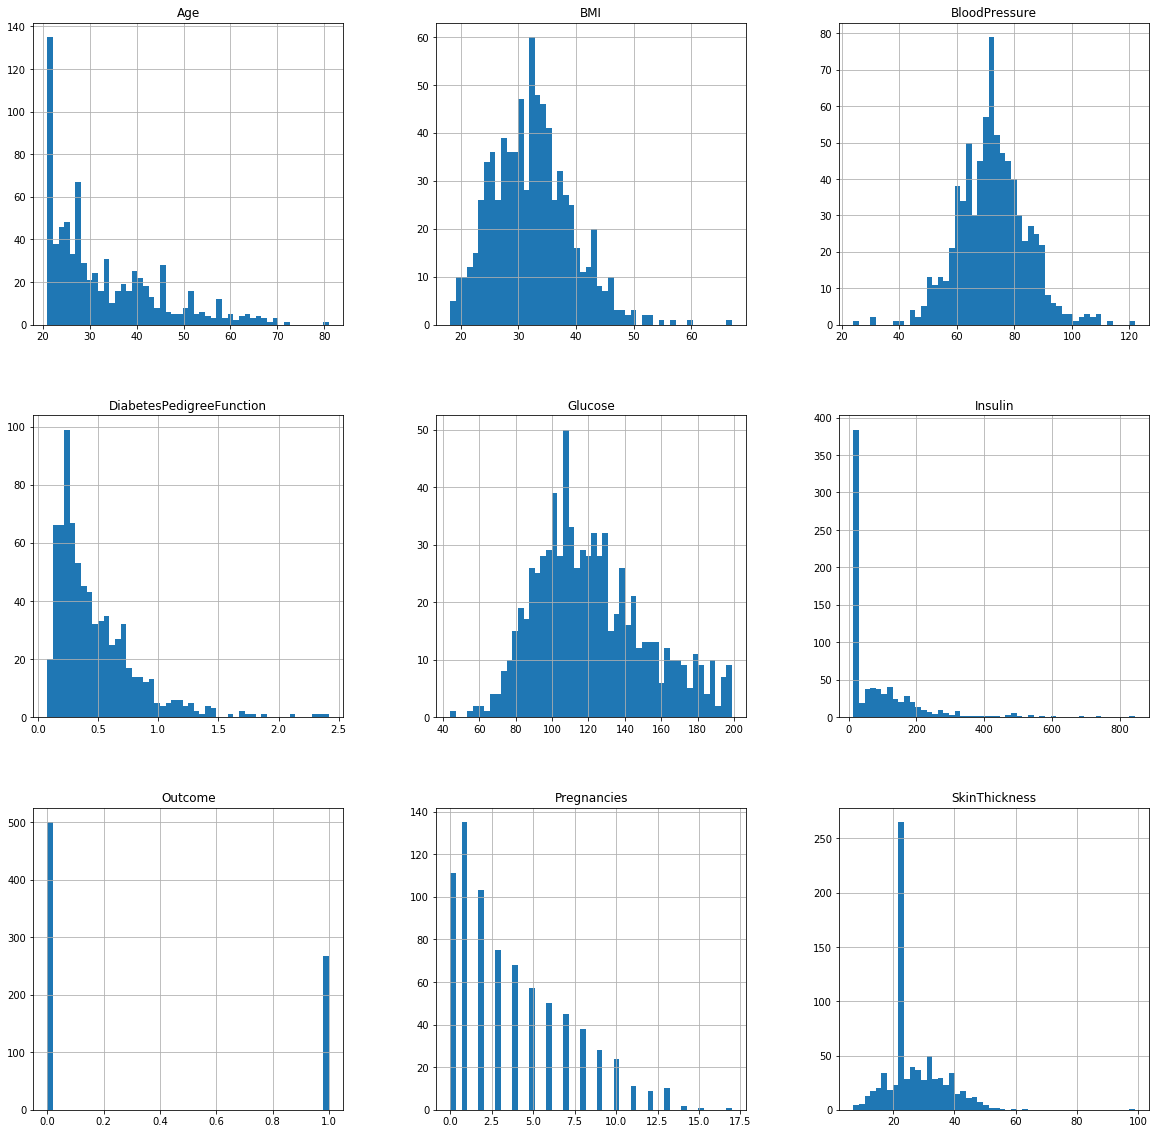

In [17]:
diabetes.hist(bins = 50, figsize = (20,20))
plt.show()

Some more exploratory analysis after replacing 0 values with median

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


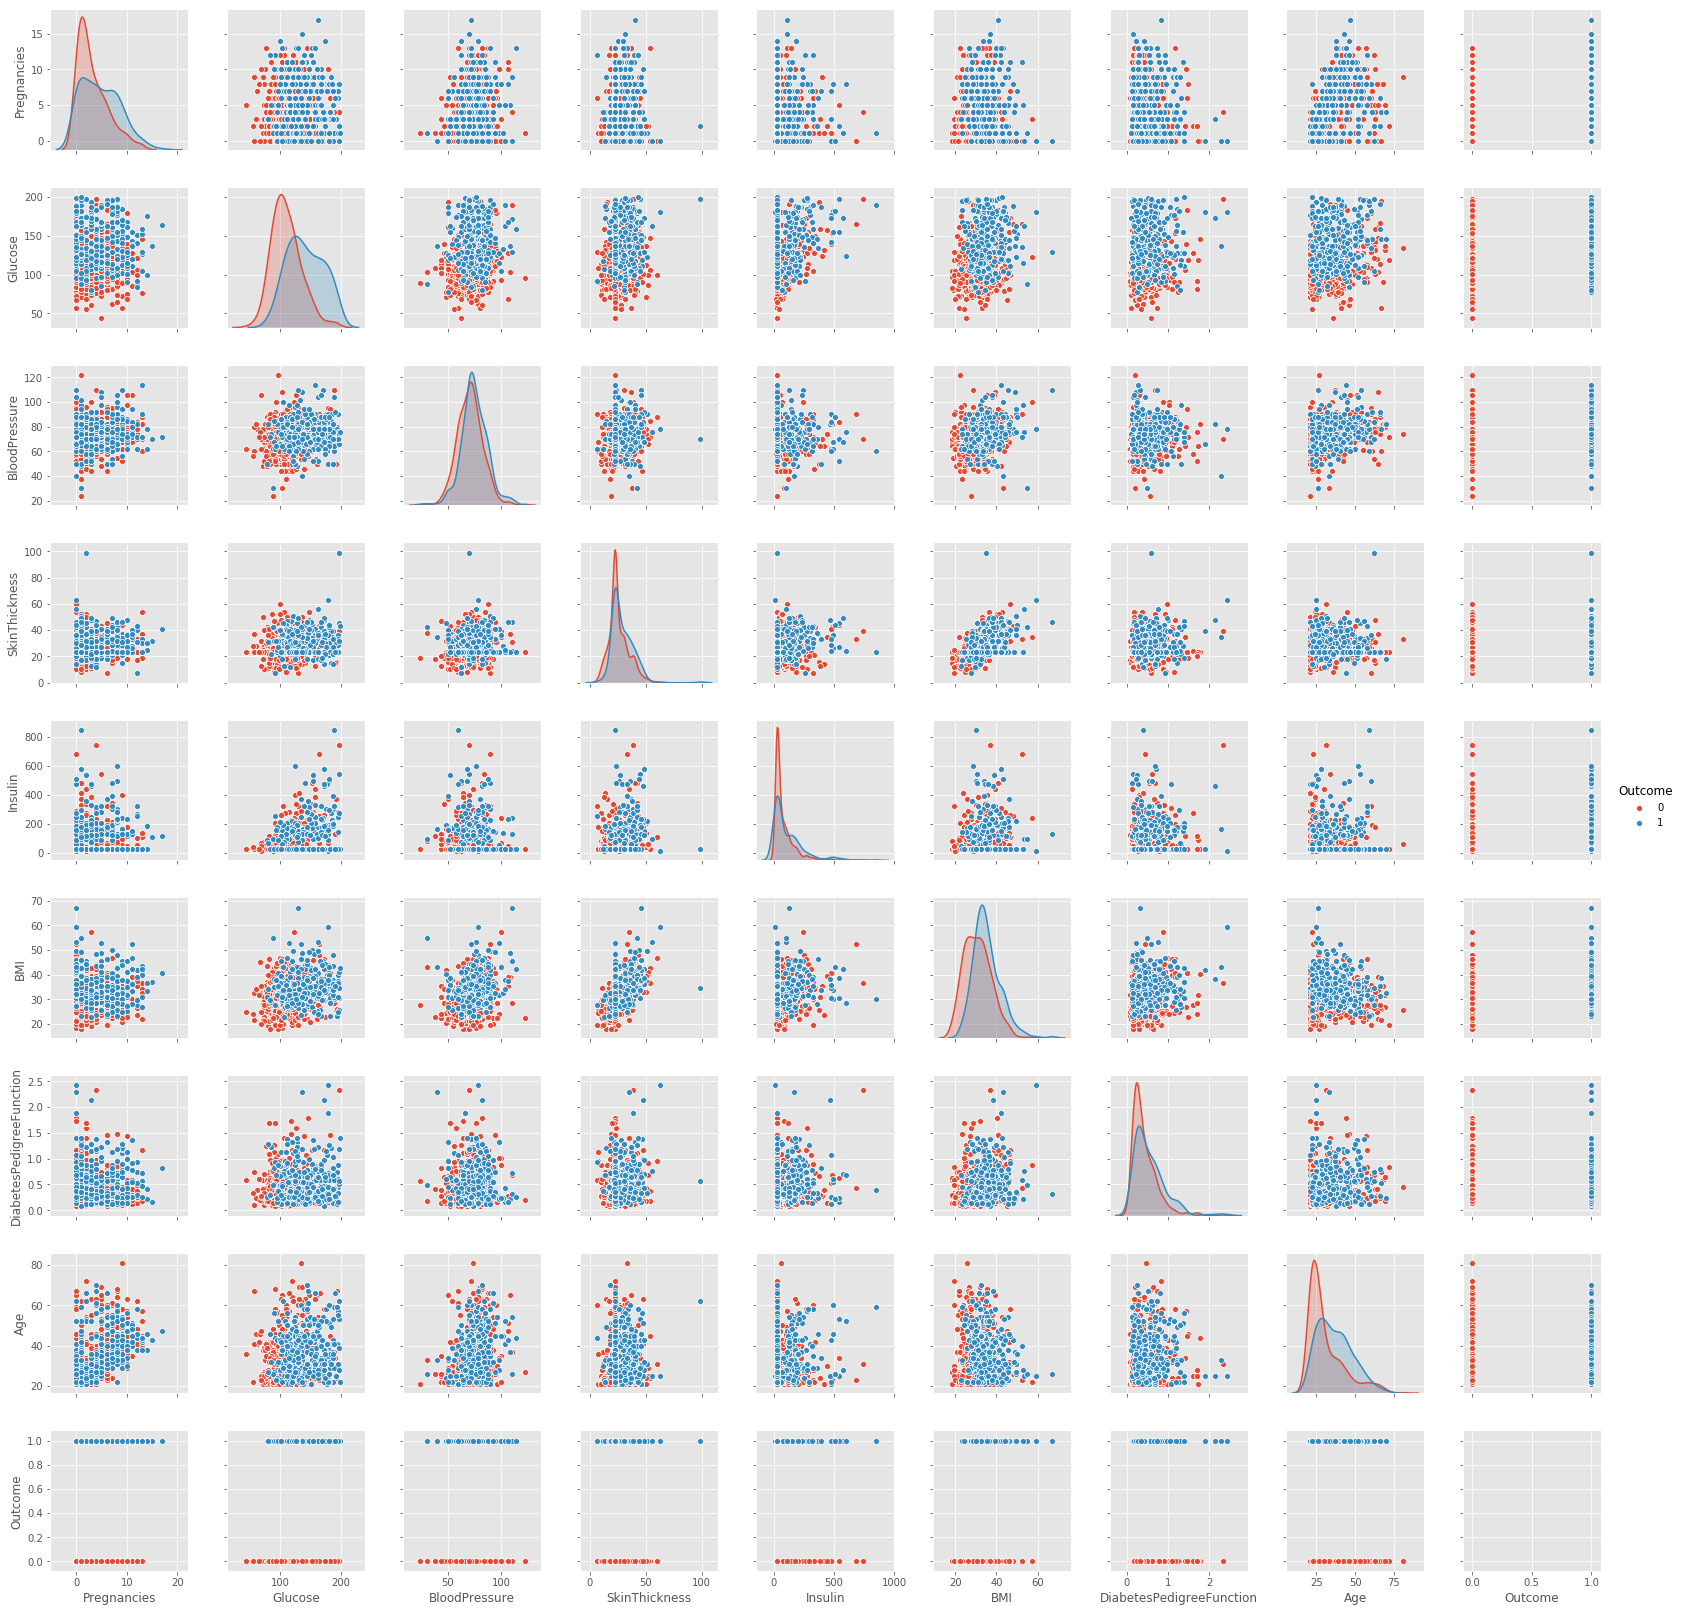

In [62]:
sns.pairplot(diabetes, hue='Outcome')

Number of times pergnanat can be zero, so not replacing 0 values for that column

In [213]:
diabetes_x = diabetes.drop("Outcome", axis=1)
diabetes_y = diabetes[['Outcome']]
print(diabetes_x)
from sklearn.model_selection import train_test_split
trainx2, testx2,trainy2,testy2  = train_test_split(diabetes_x,diabetes_y ,test_size=0.2)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
5              5      116             74             23     30.5  25.6   
6              3       78             50             32     88.0  31.0   
7             10      115             72             23     30.5  35.3   
8              2      197             70             45    543.0  30.5   
9              8      125             96             23     30.5  32.0   
10             4      110             92             23     30.5  37.6   
11            10      168             74             23     30.5  38.0   
12            10      139             

checking the balance of the data by plotting the count of outcomes by their value

0    500
1    268
Name: Outcome, dtype: int64


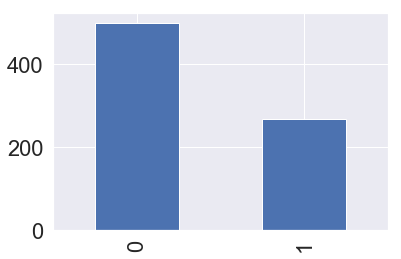

In [74]:

color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())
p=diabetes.Outcome.value_counts().plot(kind="bar")

Heatmap after cleaning data

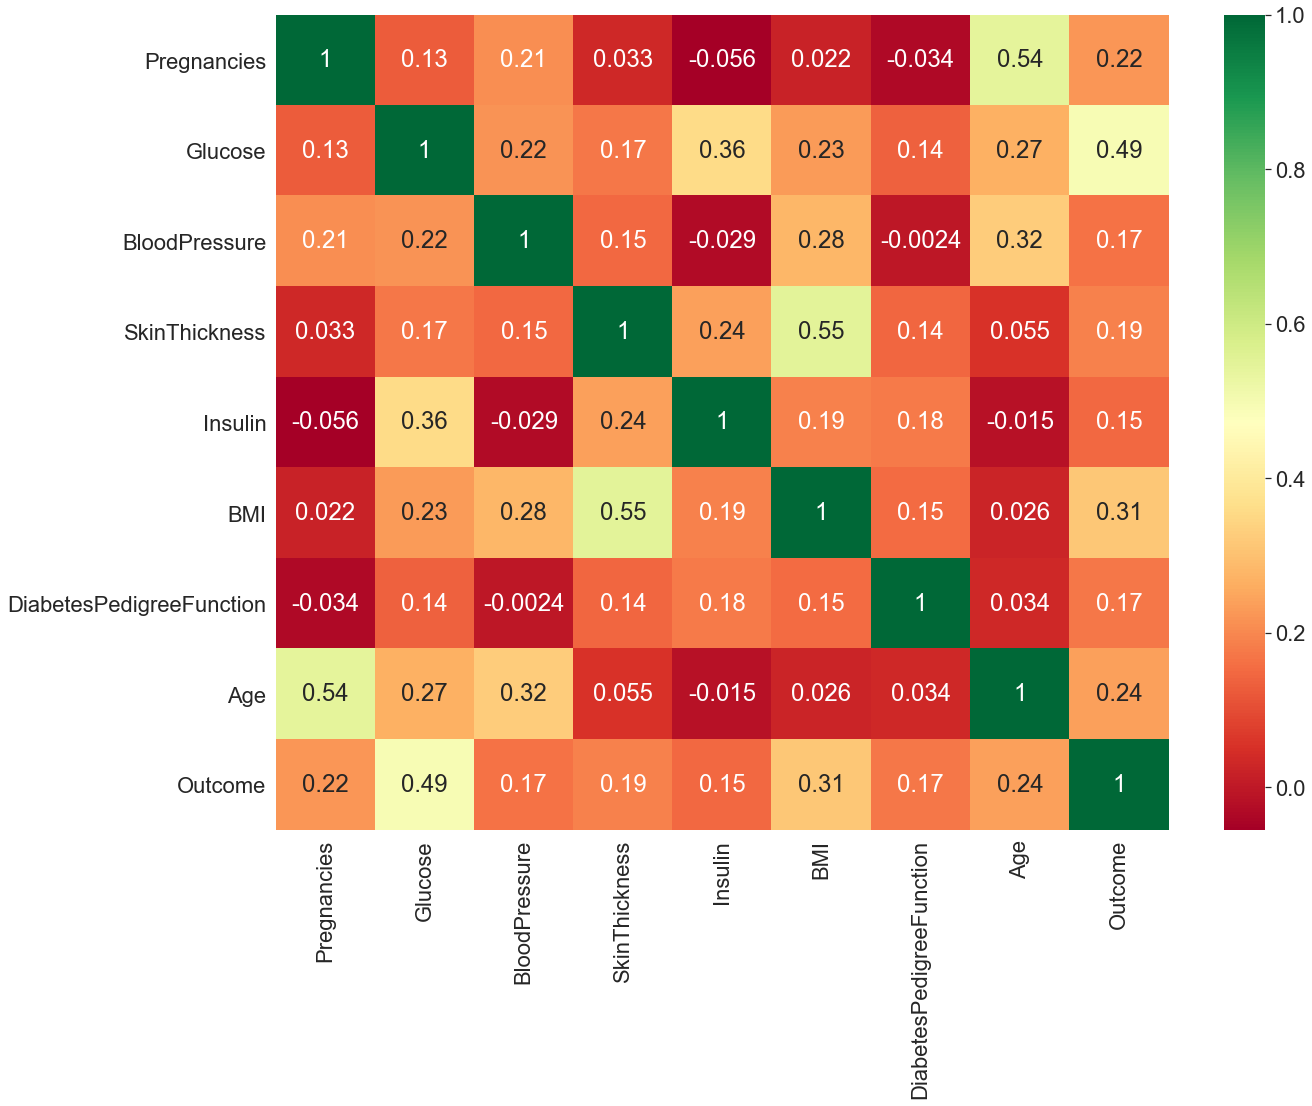

In [77]:
plt.figure(figsize=(20,15))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

violin plots

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


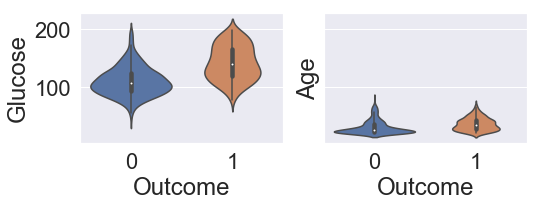

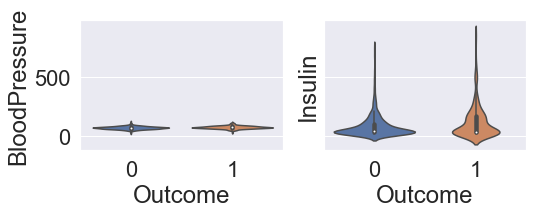

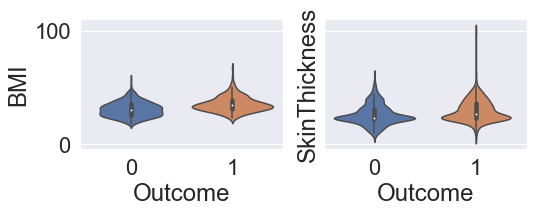

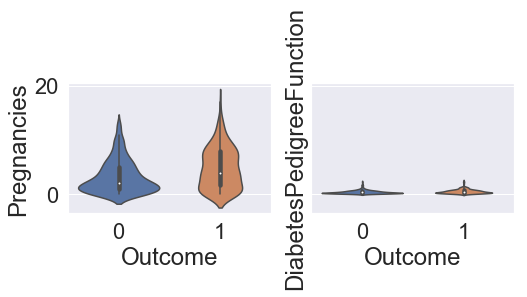

In [107]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = diabetes.Outcome, y=diabetes[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


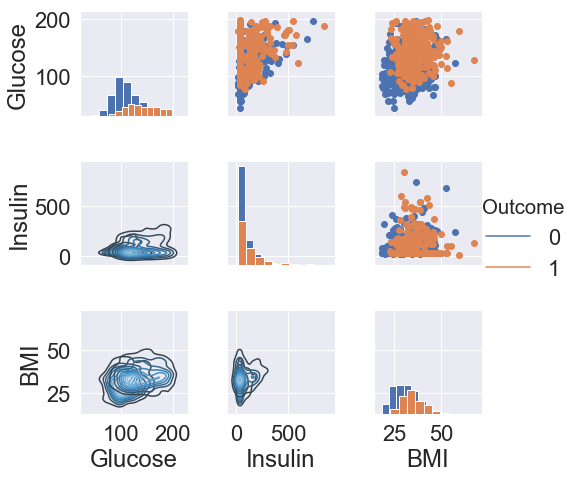

In [110]:
g = sns.PairGrid(diabetes, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


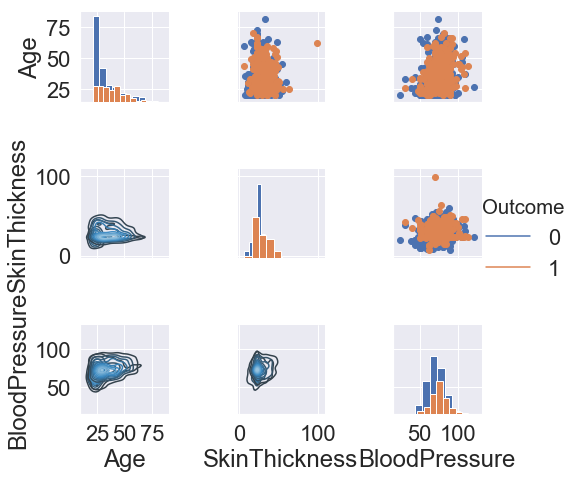

In [109]:
g = sns.PairGrid(diabetes, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


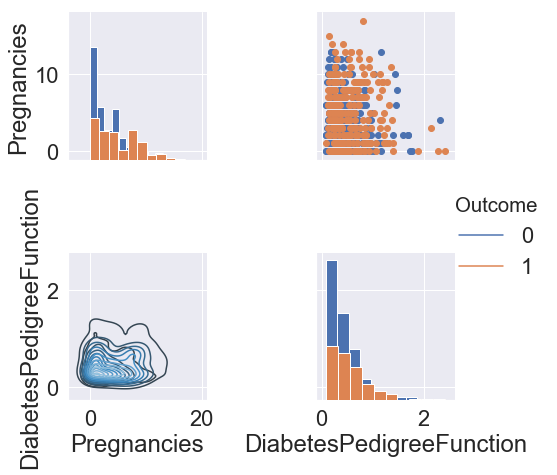

In [108]:
g = sns.PairGrid(diabetes, vars=['Pregnancies', 'DiabetesPedigreeFunction'], hue="Outcome", size=3.5)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

splitting dataset into train and test

In [9]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    diabetes, test_size=0.2, random_state=42)

In [10]:
# Separate labels from the rest of the dataset
train_labels = train["Outcome"].copy()
train = train.drop("Outcome", axis=1)

test_labels = test["Outcome"].copy()
test = test.drop("Outcome", axis=1)

Feature scaling 
All values are scaled like age has values from 20 to 80 and pregnant ranges from 0 to 17. Scaling is essential to make our dataset perform well

In [11]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


View scaled values

In [12]:
df = pd.DataFrame(data= train_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


Comparing multiple machine learning algorithms 
Logistic regression, k nearest neighbours, gaussian NB, SVC, linearSVC, Random forest, decision trees

In [24]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [26]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [171]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = train_scaled
Y = train_labels

In [28]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\si

LR: 0.755632 (0.045675)
KNN: 0.740984 (0.049627)
NB: 0.739450 (0.062140)


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

SVC: 0.757271 (0.037642)
LSVC: 0.763802 (0.042701)


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

RFC: 0.742676 (0.037818)
DTR: 0.723083 (0.054368)


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LSVC gave best accuracy of 76.3%

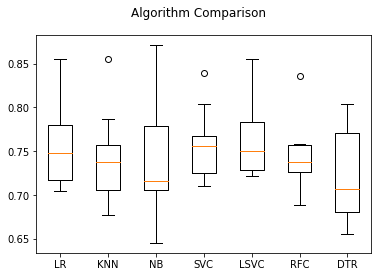

In [29]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From this boxplot its evident that SVC performed the best compared to other models. Accuracy mean is 0.757271, std dev is (0.037642) 


Trying to find the best parameters for SVC

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = GridSearchCV(
    model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_scaled, train_labels)

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 50.0], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'shrinking': [True, False], 'gamma': ['auto', 1, 0.1], 'coef0': [0.0, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
# Print the bext score found
grid_search.best_score_

0.7687296416938111

Apply the parameters to model and train it

In [34]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Use the whole dataset to train the model
X = np.append(train_scaled, test_scaled, axis=0)
Y = np.append(train_labels, test_labels, axis=0)

# Train the model
svc.fit(X, Y)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Make a prediction

In [35]:
# We create a new/unreal person having the three most correated values high
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

In [36]:
# We predict the outcome
prediction = svc.predict(new_df_scaled)

In [37]:
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1], dtype=int64)

We found a score of 76% using SVC. 76% of the times we can accurately predict if a person has diabetes or not. We can try some more machine learning algortihms to improve performance.

Trying some more machine learning algorithms k nearest neighbour classifier, SVC, Logistic Regression, Decision trees, Gaussian NB, Random forest classifier, GradientBoosting Classifier. Comparing all the results

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
models1 = []
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('SVC', SVC()))
models1.append(('LR', LogisticRegression()))
models1.append(('DT', DecisionTreeClassifier()))
models1.append(('GNB', GaussianNB()))
models1.append(('RF', RandomForestClassifier()))
models1.append(('GB', GradientBoostingClassifier()))

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [57]:
names = []
scores = []
for name, model in models1:
    model.fit(X, Y)
    y_pred = model.predict(test_scaled)
    scores.append(accuracy_score(test_labels, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.850649
1  SVC  0.779221
2   LR  0.779221
3   DT  1.000000
4  GNB  0.766234
5   RF  0.948052
6   GB  0.922078


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


These are scores on training set. Decision trees were probably over fitting as we get an accuracy of 1. Random foreset seemed to perform well with 94.8% accuracy. Gradient Boosting performed well with 92% accuracy.knn performed with 85.6% accuracy.

In [58]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models1:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, diabetes_x, diabetes_y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\py

  Name     Score
0  KNN  0.719959
1  SVC  0.651025
2   LR  0.761740
3   DT  0.688705
4  GNB  0.744771
5   RF  0.759176
6   GB  0.759074


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After cross validation,  logistic regression performed best with 76.17% accuracy.

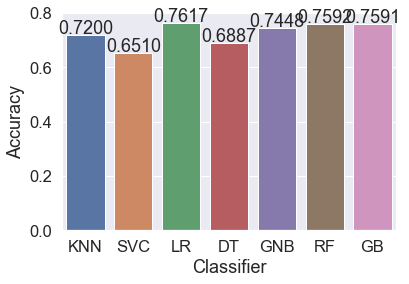

In [59]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Logistic Regression, Gaussian Naive Bayes, Random Forest, Gradient Boosting have performed better than other models.
Logistic regression got an classification accuracy of 76.19% after performing k fold cross validation.

Trying Logistic regression

In [115]:
print(X)

[[0.11764706 0.25806452 0.48979592 ... 0.28220859 0.09649872 0.        ]
 [0.52941176 0.43870968 0.59183673 ... 0.20449898 0.51409052 0.48333333]
 [0.05882353 0.61290323 0.2244898  ... 0.21472393 0.24594364 0.01666667]
 ...
 [0.58823529 0.36774194 0.63265306 ... 0.5603272  0.45175064 0.28333333]
 [0.         0.62580645 0.48979592 ... 0.49488753 0.05422716 0.13333333]
 [0.         0.52258065 0.73469388 ... 0.08793456 0.07856533 0.        ]]


In [116]:
print(Y)

60     0
618    1
346    0
294    0
231    1
340    0
535    1
306    1
718    0
90     0
377    0
235    1
158    0
69     0
260    0
131    1
44     0
70     1
264    1
673    0
286    0
640    0
135    0
745    0
165    1
164    1
28     0
608    0
583    0
746    1
      ..
21     0
313    0
459    0
160    0
276    1
191    0
385    0
413    0
491    0
343    0
308    1
661    1
130    1
663    1
99     1
372    0
87     0
458    1
330    0
214    1
466    0
121    0
614    1
20     0
700    0
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64


In [117]:
print(test_scaled)

[[0.35294118 0.3483871  0.34693878 ... 0.32310838 0.15029889 0.36666667]
 [0.11764706 0.43870968 0.52040816 ... 0.35787321 0.02988898 0.        ]
 [0.11764706 0.41290323 0.40816327 ... 0.25766871 0.03415884 0.        ]
 ...
 [0.47058824 0.32903226 0.48979592 ... 0.3803681  0.17378309 0.6       ]
 [0.11764706 0.65806452 0.46938776 ... 0.200409   0.11058924 0.13333333]
 [0.47058824 0.19354839 0.46938776 ... 0.34969325 0.2677199  0.3       ]]


In [118]:
print(test_labels)

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
636    0
544    0
86     0
208    0
281    0
209    1
581    0
639    0
328    1
431    0
      ..
101    0
763    0
706    1
259    1
193    1
549    0
2      1
215    1
382    0
648    1
606    1
714    0
731    1
691    1
603    1
617    0
79     0
694    0
433    0
486    0
677    0
133    0
218    1
55     0
725    0
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64


trying different machine learning algorithms

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy  77.27272727272727


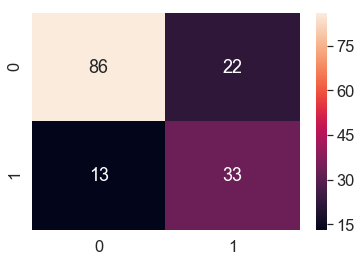

In [131]:
from  sklearn.metrics import confusion_matrix
LR1 = LogisticRegression()

#fiting the model
LR1.fit(X, Y)

#prediction
y_predd = LR1.predict(test_scaled)

#Accuracy
print("Accuracy ", LR1.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cmm = confusion_matrix(y_predd, test_labels)
sns.heatmap(cmm, annot=True, fmt='g')
plt.show()

In [132]:
y_predd

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

Accuracy was quite low at 77.27% for logistic regression

Gradient Boosting classifier

Accuracy  73.37662337662337


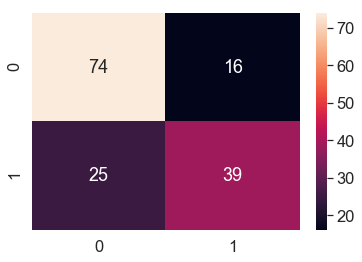

In [125]:
#Model
model9 = GradientBoostingClassifier()

#fiting the model
model9.fit(X, Y)

#prediction
y_pred4 = model9.predict(test_scaled)

#Accuracy
print("Accuracy ", model9.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm2 = confusion_matrix(y_pred4, test_labels)
sns.heatmap(cm2, annot=True, fmt='g')
plt.show()

In [126]:
y_pred4

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

Gradient boosting seemed to perform worser than logistic regression byhaving an accuracy of 73.37%

Decision tree

Accuracy  75.32467532467533


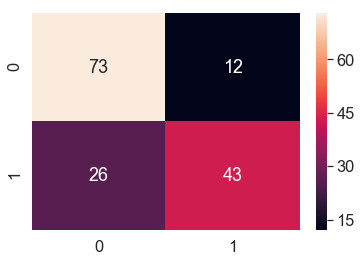

In [123]:
#Model
DT1 = DecisionTreeClassifier()

#fiting the model
DT1.fit(X,Y)
#prediction
y_pred3 = DT1.predict(test_scaled)

#Accuracy
print("Accuracy ", DT1.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm1 = confusion_matrix(y_pred3, test_labels)
sns.heatmap(cm1, annot=True, fmt='g')
plt.show()

In [124]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

Decision tree showed 75.3246% accuracy.

Decision tree shows quite low accuracy. We can use that to do further classification methods 

Accuracy  76.62337662337663


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


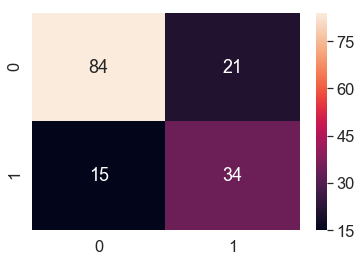

In [121]:
from sklearn.ensemble import RandomForestClassifier
#Model
RFO = RandomForestClassifier()

#fiting the model
RFO.fit(X,Y)
#prediction
y_pred0 = RFO.predict(test_scaled)

#Accuracy
print("Accuracy ", RFO.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm0 = confusion_matrix(y_pred0, test_labels)
sns.heatmap(cm0, annot=True, fmt='g')
plt.show()

In [122]:
y_pred0

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

Random forest gave an accuracy of 76.623% which is not so good. 

Accuracy  79.22077922077922


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


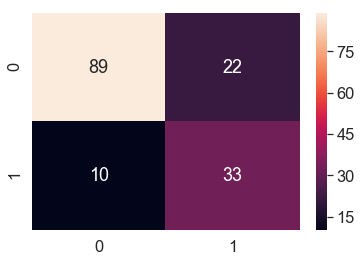

In [127]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
#Model
SVC1 =SVC()

#fiting the model
SVC1.fit(X,Y)
#prediction
y_pred9 = SVC1.predict(test_scaled)

#Accuracy
print("Accuracy ", SVC1.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm9 = confusion_matrix(y_pred9, test_labels)
sns.heatmap(cm9, annot=True, fmt='g')
plt.show()

SVC gave an accuracy of 79.22% being the best model so far.

Accuracy  77.27272727272727


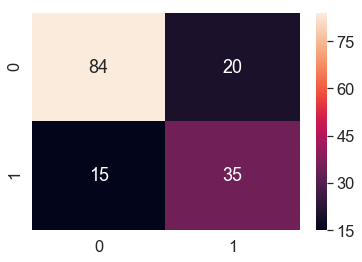

In [128]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
#Model
LSVC1 =LinearSVC()

#fiting the model
LSVC1.fit(X,Y)
#prediction
y_pred7 = LSVC1.predict(test_scaled)

#Accuracy
print("Accuracy ", LSVC1.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm7 = confusion_matrix(y_pred7, test_labels)
sns.heatmap(cm7, annot=True, fmt='g')
plt.show()

In [129]:
y_pred7

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

Linear svc gave an accuracy of 77.27% being the second best model giving same accuracy as logsitc regression

KNeighborsClassifier

Accuracy  75.97402597402598


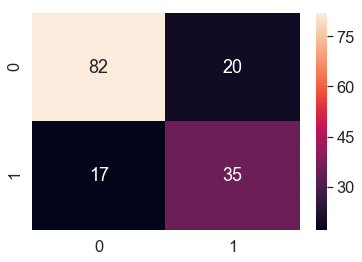

In [143]:
from sklearn.neighbors import KNeighborsClassifier

#Model
knn1 =KNeighborsClassifier()

#fiting the model
knn1.fit(X,Y)
#prediction
y_pre = knn1.predict(test_scaled)

#Accuracy
print("Accuracy ", knn1.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
conf = confusion_matrix(y_pre, test_labels)
sns.heatmap(conf, annot=True, fmt='g')
plt.show()

Text(0, 0.5, 'Feature 1')

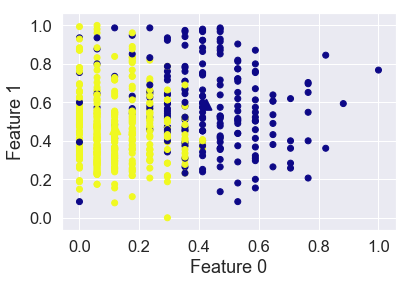

In [156]:
from sklearn.cluster import KMeans
# cluster the data into five clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
ypre = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=ypre, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Knn gave an accuracy of 75.97%

Text(0, 0.5, 'Feature 1')

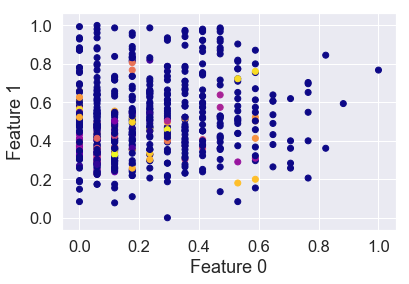

In [172]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [173]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(Y, ypre))
#DBSCAN performance:
print("ARI =", adjusted_rand_score(Y, clusters))


ARI = 0.12717855921392646
ARI = -0.05213590691218497


DBSCAN didnt do a good job, so we just ignore the results.

In [178]:
from tensorflow.contrib import keras
from keras import models, layers, losses, optimizers, metrics

model2 = models.Sequential()
# Hyperparameters
hold_prob = 0.01
beta = 1e-8
alpha = 0.05
lr_decay = 0.01
iterations = 20
validation_split = 0.5
opt_momentum = 0.9 # (Use only for SGD)
batch_size = 32

# Optimizer
opt = optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)
#First Layer
model2.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model2.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model2.add(layers.Dropout(hold_prob))

model2.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model2.add(layers.Dropout(hold_prob))

model2.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model2.add(layers.Dropout(hold_prob))

# Output Layer
model2.add(layers.Dense(units=2, activation='softmax'))

# Compiling the Model
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
nn = model2.fit(x=X, y=Y, epochs=iterations, validation_split=validation_split, batch_size=batch_size)

Train on 307 samples, validate on 307 samples
Epoch 1/20
307/307 [==============================] - 1s 3ms/step - loss: 0.6504 - acc: 0.6515 - val_loss: 0.6313 - val_acc: 0.6547
Epoch 2/20
307/307 [==============================] - 0s 77us/step - loss: 0.6250 - acc: 0.6515 - val_loss: 0.6017 - val_acc: 0.6547
Epoch 3/20
307/307 [==============================] - 0s 66us/step - loss: 0.6037 - acc: 0.6515 - val_loss: 0.5709 - val_acc: 0.6743
Epoch 4/20
307/307 [==============================] - 0s 104us/step - loss: 0.5740 - acc: 0.7101 - val_loss: 0.5712 - val_acc: 0.6840
Epoch 5/20
307/307 [==============================] - 0s 97us/step - loss: 0.5477 - acc: 0.7427 - val_loss: 0.5046 - val_acc: 0.7362
Epoch 6/20
307/307 [==============================] - 0s 114us/step - loss: 0.5119 - acc: 0.7459 - val_loss: 0.4935 - val_acc: 0.7459
Epoch 7/20
307/307 [==============================] - 0s 77us/step - loss: 0.5186 - acc: 0.7394 - val_loss: 0.4808 - val_acc: 0.7492
Epoch 8/20
307/307 [==

In [184]:
model2.predict(test_scaled)
model2.evaluate(test_scaled, test_labels)

154/154 [==============================] - 0s 52us/step


[0.517437382177873, 0.7142857166079731]

In [187]:
#import classification_report
from sklearn.metrics import classification_report
predictions = model2.predict_classes(test_scaled)
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

   micro avg       0.71      0.71      0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



Neural netwroks gave a acuracy of 71.428% which was quite low. The lost was 0.51. Neural networks was not appropriate for a small dataset.

Accuracy  77.27272727272727


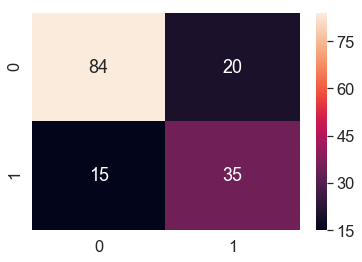

In [201]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#FITTING THE LDA MODEL ON THE TEST DATASET
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X, Y)
predictions_lda = lda1.predict(test_scaled)
print("Accuracy ", lda1.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cmatr = confusion_matrix(predictions_lda, test_labels)
sns.heatmap(cmatr, annot=True, fmt='g')
plt.show()

lda gave ana accuracy of 77.27% similar to LSVC, LOGREG. So its the second best model

Accuracy  75.32467532467533


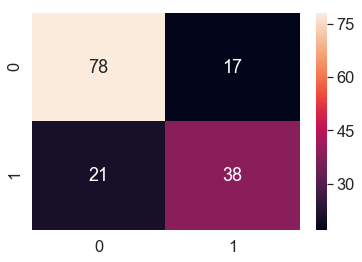

In [204]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, Y)
predictions_gnb = gnb.predict(test_scaled)
print("Accuracy ", gnb.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
com = confusion_matrix(predictions_gnb, test_labels)
sns.heatmap(com, annot=True, fmt='g')
plt.show()

Gaussian naive bayes gave an accuracy of 75.325%.

RUNNING MODELS AFTER PCA

In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(trainx2)
X_test = sc.transform(testx2)
#Applying PCA here
from sklearn.decomposition import PCA
pca = PCA(n_components= None) #We will set it none so that we can see the variance explained and then choose no of comp.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([0.27066594, 0.20639728, 0.14186033, 0.10910624, 0.09718788,
       0.06786604, 0.05797208, 0.04894421])

Accuracy  66.23376623376623


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\preek\appdat

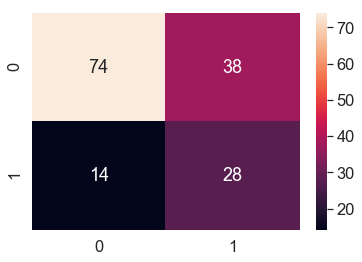

In [214]:

sc = StandardScaler()
X_train = sc.fit_transform(trainx2)
X_test = sc.transform(testx2)

pca = PCA(n_components= 2) # here you can change this number to play around
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(random_state=0)
lrclassifier.fit(X_train,trainy2)

#Predict the test set values
ypredlr = lrclassifier.predict(X_test)

print("Accuracy ", lrclassifier.score(X_test, testy2)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cmatr = confusion_matrix(ypredlr, testy2)
sns.heatmap(cmatr, annot=True, fmt='g')
plt.show()


after pca the accuracy of logsitic regression reduced to 66.23%. PCA is not good for this data.
Logistic regression before pca had an accuracy of 77.27%. After pca, accuracy dropped.
So pca is not recommended for small data.

Accuracy  64.28571428571429


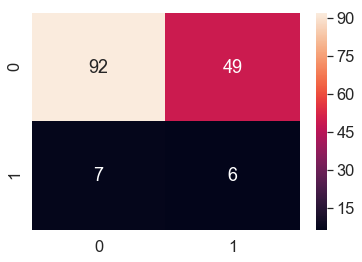

[0.65079365 0.56451613 0.67741935 0.68852459 0.60655738 0.62295082
 0.63934426 0.63934426 0.6557377  0.59016393]


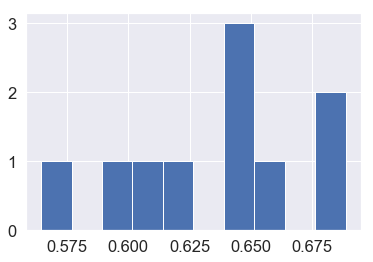

In [219]:
#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,Y)

#Predict the result for test values
ypredrbf = classifier_svm_kernel.predict(X_test)

print("Accuracy ", classifier_svm_kernel.score(test_scaled, test_labels)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
comrbf = confusion_matrix(ypredrbf, test_labels)
sns.heatmap(comrbf, annot=True, fmt='g')
plt.show()

#Apply k-fold validation here
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_svm_kernel,X=X_train,y=Y,cv=10)
print(accuracies)

plt.hist(accuracies)
plt.show()

Accuracy of rbf kernel in svc in 64.28%
variance is less, accuracy is around 0.643. we have used all features in svm. pca didn't do much impact in the results. it dropped the accuracy.

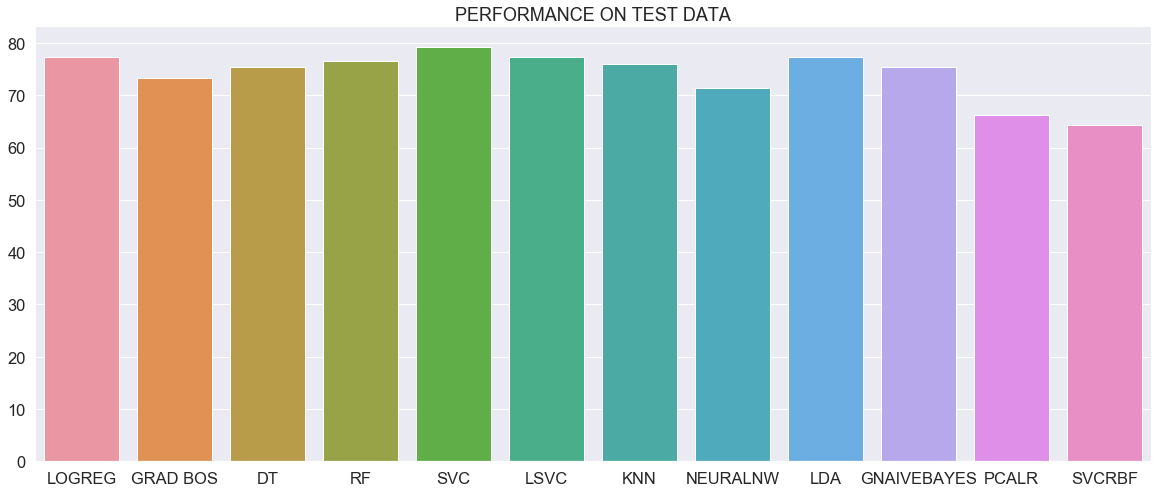

In [222]:
import seaborn as sns
plt.figure(figsize=(20,8))
NAMES = ['LOGREG','GRAD BOS','DT','RF', 'SVC','LSVC', 'KNN','NEURALNW','LDA', 'GNAIVEBAYES','PCALR','SVCRBF']
SCORE = [ 77.2727, 73.37, 75.34, 76.62, 79.22, 77.27,75.97, 71.43,77.27, 75.34,66.23, 64.29]
plt.title('PERFORMANCE ON TEST DATA')
sns.barplot(x=NAMES, y=SCORE )

conclusion : SVC clearly performed better than all models with an accuracy of 79.22%. Second best was logistic regression, linear svc, lda followed by decision tree and naive bayes, knn random forest, grad boost.
Models like neyral network and pca do not perform well. 
PCA reduced the results drastically. PCA is not recommended for this dataset.
Every model performs differently depending on how we model data.
So, for this dataset, svc might be the choice. We can further optimize parameters for svc or knn.
If outlinears are removed, results can be improved more better. 
We can improve accuracy by tuning hyperparameters and remving outliners and influenciers.

K-nearest neighbours optimizing parameters

In [78]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X,Y)
    
    train_scores.append(knn.score(X,Y))
    test_scores.append(knn.score(test_scaled,test_labels))

In [79]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [80]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 100.0 % and k = [1]


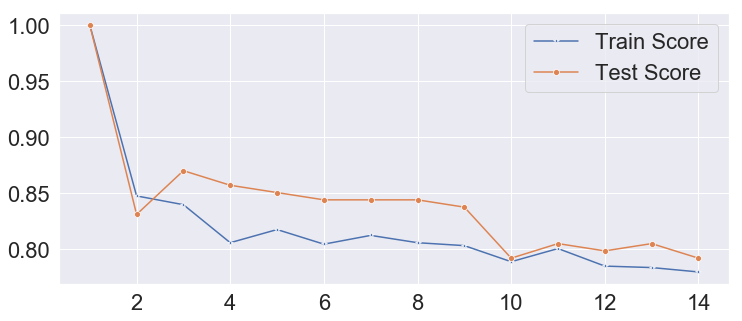

In [81]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is found ar k-11, so k=11 is used for final model

In [189]:
#Setup a knn classifier with k neighbors
knn2 = KNeighborsClassifier(11)

knn2.fit(X,Y)
knn2.score(test_scaled,test_labels)

0.7337662337662337

K neareset neighbours had a score of 73.37%.

In [191]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
ypredi = knn2.predict(test_scaled)
confusion_matrix(test_labels,y_pred2)
pd.crosstab(test_labels, ypredi, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,81,18,99
1,23,32,55
All,104,50,154


In [192]:
print(ypredi)

[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


Plotting confusion matrix

Text(0.5, 7.5, 'Predicted label')

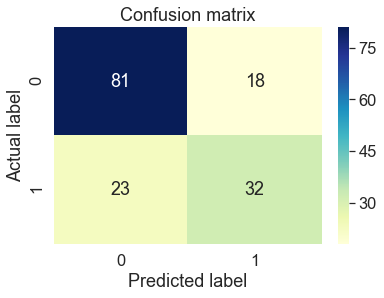

In [193]:
y_pred = knn.predict(test_scaled)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_labels, ypredi)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [194]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(test_labels,ypredi))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

   micro avg       0.73      0.73      0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [195]:
from sklearn.metrics import roc_curve
y_pred_proba = knn2.predict_proba(test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

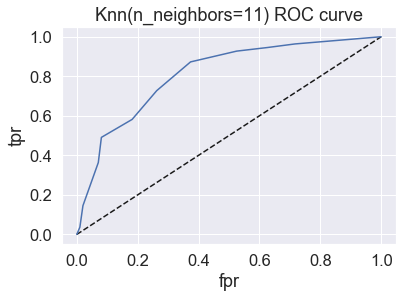

In [196]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [197]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels,y_pred_proba)

0.8096418732782369

Optimizing parameters for knn

In [198]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(diabetes_x,diabetes_y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\py

Best Score:0.7513020833333334
Best Parameters: {'n_neighbors': 34}


c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\preek\appdata\local\programs\py

knn has an accuracy of 75.13% and neigbours are 34

Plotting feature importance

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Feature ranking:
1. feature Glucose (0.241880)
2. feature BMI (0.143973)
3. feature Age (0.134513)
4. feature DiabetesPedigreeFunction (0.114643)
5. feature Pregnancies (0.106000)
6. feature BloodPressure (0.096079)
7. feature SkinThickness (0.085017)
8. feature Insulin (0.077894)


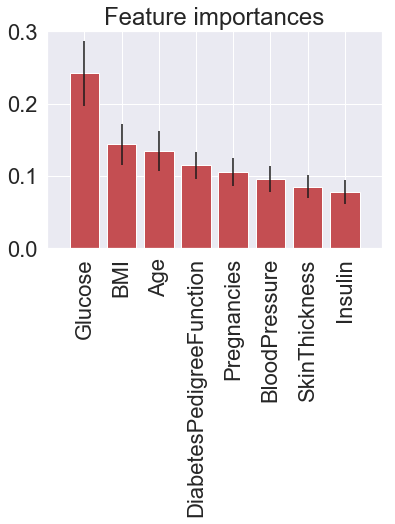

In [124]:
def plot_feature_importance(X,y,h):
    from sklearn.ensemble import ExtraTreesClassifier
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(diabetes_x, diabetes_y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    lables=[]
    for f in range(X.shape[1]):
        l= h[indices[f]]
        lables.append(l)
        print("%d. feature %s (%f)" % (f + 1,l, importances[indices[f]]))
        
         # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), lables,rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

col_names= list(diabetes.columns.values)
col_names.remove('Outcome')
plot_feature_importance(diabetes_x,diabetes_y,col_names)

We see that glucose has maximum importance, BMI has second next importance.
Insulin, skin thickness has little less importance at 0.1 compared to other fatures.

feature selection

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [143]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(diabetes_x,diabetes_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(diabetes_x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1989.589394
1                   Glucose  1418.442397
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.933725
3             SkinThickness    85.431282
2             BloodPressure    42.582507
6  DiabetesPedigreeFunction     5.392682


Insulin has maximum importance followed by glucose, age, pregnancies, BMI. 
Skin thickness, blood pressure, diabetes pedigree has less importance.

Extra trees classifier

c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\preek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.10168139 0.23173131 0.09794151 0.08225228 0.07804263 0.14571106
 0.12175992 0.1408799 ]


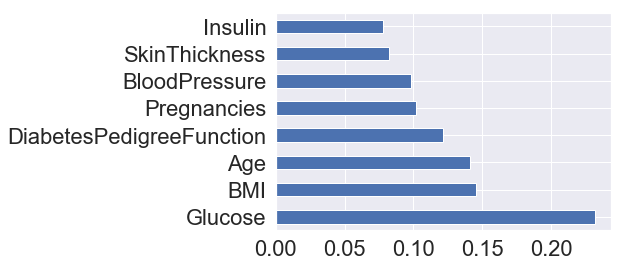

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(diabetes_x,diabetes_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=diabetes_x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

Glucose has the maximum importance followed by BMI, AGE, diabetes pedigree function, pregnancies, blood pressure, skin thickness.
Insulin is the least important feature in predicting diabetes.

Machine learning models were built to predict diabetes of a person. KNN, Logistic regression, SVM seemed to perform better.
Decision trees, gradient boosting, random forest seemed to perform well.
Neural networks didnt perform well with only 76% accuracy.

THE BELOW PART WAS ATTEMPTED IN PYSPARK 

Reading diabetes sdata in pyspark

In [1]:
rawdata = spark.read.format("csv").option("header","true").option("inferSchema", "true").load("diabetes.csv")
rawdata.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [2]:
rawdata.describe().select("Summary","Pregnancies","Glucose","BloodPressure").show()

+-------+------------------+-----------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|
+-------+------------------+-----------------+------------------+
|  count|               768|              768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|
|    min|                 0|                0|                 0|
|    max|                17|              199|               122|
+-------+------------------+-----------------+------------------+



In [3]:
rawdata.describe().select("Summary","Pregnancies","Glucose","BloodPressure").show()

+-------+------------------+-----------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|
+-------+------------------+-----------------+------------------+
|  count|               768|              768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|
|    min|                 0|                0|                 0|
|    max|                17|              199|               122|
+-------+------------------+-----------------+------------------+



In [4]:
rawdata.describe().select("Summary","BMI","DiabetesPedigreeFunction","Age").show()

+-------+------------------+------------------------+------------------+
|Summary|               BMI|DiabetesPedigreeFunction|               Age|
+-------+------------------+------------------------+------------------+
|  count|               768|                     768|               768|
|   mean|31.992578124999977|      0.4718763020833327|33.240885416666664|
| stddev| 7.884160320375441|       0.331328595012775|11.760231540678689|
|    min|               0.0|                   0.078|                21|
|    max|              67.1|                    2.42|                81|
+-------+------------------+------------------------+------------------+



Mimimum values are zero for "glucose”, “blood pressure”, “skin thickness”,”insulin” and “BMI”.
Replacing zero with NaN except pregnancies as it makes sense to have zero.

In [5]:
import numpy as np
from pyspark.sql.functions import when
rawdata=rawdata.withColumn("Glucose",when(rawdata.Glucose==0,np.nan).otherwise(rawdata.Glucose))
rawdata=rawdata.withColumn("BloodPressure",when(rawdata.BloodPressure==0,np.nan).otherwise(rawdata.BloodPressure))
rawdata=rawdata.withColumn("SkinThickness",when(rawdata.SkinThickness==0,np.nan).otherwise(rawdata.SkinThickness))
rawdata=rawdata.withColumn("BMI",when(rawdata.BMI==0,np.nan).otherwise(rawdata.BMI))
rawdata=rawdata.withColumn("Insulin",when(rawdata.Insulin==0,np.nan).otherwise(rawdata.Insulin))
rawdata.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)

+-------+-------+-------------+-------------+----+
|Insulin|Glucose|BloodPressure|SkinThickness| BMI|
+-------+-------+-------------+-------------+----+
|    NaN|  148.0|         72.0|         35.0|33.6|
|    NaN|   85.0|         66.0|         29.0|26.6|
|    NaN|  183.0|         64.0|          NaN|23.3|
|   94.0|   89.0|         66.0|         23.0|28.1|
|  168.0|  137.0|         40.0|         35.0|43.1|
+-------+-------+-------------+-------------+----+
only showing top 5 rows



Impute Nan values by calling an imputer

In [6]:
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"],outputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"])
model5=imputer.fit(rawdata)
rawdata=model5.transform(rawdata)
rawdata.show(5)

+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|     SkinThickness|          Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|          6|  148.0|         72.0|              35.0|155.5482233502538|33.6|                   0.627| 50|      1|
|          1|   85.0|         66.0|              29.0|155.5482233502538|26.6|                   0.351| 31|      0|
|          8|  183.0|         64.0|29.153419593345657|155.5482233502538|23.3|                   0.672| 32|      1|
|          1|   89.0|         66.0|              23.0|             94.0|28.1|                   0.167| 21|      0|
|          0|  137.0|         40.0|              35.0|            168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+------------------+-----------------+----+---

Combining all features into single row

In [7]:
cols=rawdata.columns
cols.remove("Outcome")
# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset
rawdata=assembler.transform(rawdata)
rawdata.select("features").show(truncate=False)

+-----------------------------------------------------------------------------------+
|features                                                                           |
+-----------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482233502538,33.6,0.627,50.0]                            |
|[1.0,85.0,66.0,29.0,155.5482233502538,26.6,0.351,31.0]                             |
|[8.0,183.0,64.0,29.153419593345657,155.5482233502538,23.3,0.672,32.0]              |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]                                          |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]                                        |
|[5.0,116.0,74.0,29.153419593345657,155.5482233502538,25.6,0.201,30.0]              |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]                                          |
|[10.0,115.0,72.40518417462484,29.153419593345657,155.5482233502538,35.3,0.134,29.0]|
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]          

Standardscalar to scalerize newly created feature

In [8]:
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
rawdata=standardscaler.fit(rawdata).transform(rawdata)
rawdata.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|
|[1.0,85.0,66.0,29...|[0.29677306220323...|
|[8.0,183.0,64.0,2...|[2.37418449762590...|
|[1.0,89.0,66.0,23...|[0.29677306220323...|
|[0.0,137.0,40.0,3...|[0.0,4.5012560836...|
+--------------------+--------------------+
only showing top 5 rows



Splitting into test and train

In [9]:
train, test = rawdata.randomSplit([0.8, 0.2], seed=12345)

Checking for imbalance in data

In [10]:
dataset_size=float(train.select("Outcome").count())
numPositives=train.select("Outcome").where('Outcome == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 206
Percentage of ones are 34.27620632279534


Handling imbalance in data

In [11]:
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.6572379367720466


Creating a new column called classWeights in train dataset

In [12]:
train=train.withColumn("classWeights", when(train.Outcome == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+-------------------+
|       classWeights|
+-------------------+
|0.34276206322795344|
|0.34276206322795344|
|0.34276206322795344|
|0.34276206322795344|
|0.34276206322795344|
+-------------------+
only showing top 5 rows



feature selection

In [13]:
# Feature selection using chisquareSelector
from pyspark.ml.feature import ChiSqSelector
css = ChiSqSelector(featuresCol='Scaled_features',outputCol='Aspect',labelCol='Outcome',fpr=0.05)
train=css.fit(train).transform(train)
test=css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,2.562758938133151,7.274924068899646,3.29885013976358,0.47047140468429116,5.367154589366346,1.3098778871870878,1.785679127775751]  |
|[0.0,2.8256060087109103,5.621532235058818,3.640110499049468,1.8295247783934943,5.207158111092553,0.7183201316832416,2.125808485447323] |
|[0.0,2.9898854278220095,5.621532235058818,3.640110499049468,2.4699748745925287,5.8035086210221465,1.1499158410559458,2.125808485447323]|
|[0.0,3.1213089631108892,5.290853868290652,4.436384670716539,1.2349874372962644,6.487129937282901,1.1046435638490186,1.870711467193644] |
|[0.0,3.1213089631108892,6.6135673

Builing a classification model using logistic regression(LR)

In [14]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Outcome", featuresCol="Aspect",weightCol="classWeights",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Outcome","prediction").show(10)

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       1.0|
+-------+----------+
only showing top 10 rows



Evaluating the model

In [15]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="Outcome")
predict_test.select("Outcome","rawPrediction","prediction","probability").show(5)
print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

+-------+--------------------+----------+--------------------+
|Outcome|       rawPrediction|prediction|         probability|
+-------+--------------------+----------+--------------------+
|      0|[2.58888023648551...|       0.0|[0.93014249279728...|
|      0|[2.32098145085482...|       0.0|[0.91059987057264...|
|      0|[1.68081620680194...|       0.0|[0.84301258010142...|
|      0|[0.64946166218389...|       0.0|[0.65688913922505...|
|      0|[1.78997774283908...|       0.0|[0.85692454770533...|
+-------+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train set is 0.838687476957108
The area under ROC for test set is 0.8447004608294926


Tuning parameters in Logistic Regression

In [16]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder()\
    .addGrid(lr.aggregationDepth,[2,5,10])\
    .addGrid(lr.elasticNetParam,[0.0, 0.5, 1.0])\
    .addGrid(lr.fitIntercept,[False, True])\
    .addGrid(lr.maxIter,[10, 100, 1000])\
    .addGrid(lr.regParam,[0.01, 0.5, 2.0]) \
    .build()

Performing K-fold cross validation

In [17]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train)
predict_test=cvModel.transform(test)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.842878210642743
The area under ROC for test set after CV  is 0.8482334869431638


There has been no significant improvement in performance after tuning hyperparameters.  Logistic regression has a ROC for test set of 0.84823 after cv. Before cv it had 0.8447004608294926. Not much of improvement after CV.

Machine learning models logistic regression was built in pyspark with 84.2% accuracy on test set.

In conclusion several machine learning models were built using pyspark and python. 
Models like logisitc regression, decision trees, random forest, gausian nb, gradient boosting, k-means, svm seemed to perform better than toher alogrithms.
If the parameters are tweaked, performance could be improved and accuracy could be raised.

conclusion: svm, logistic regression, knn, lda performed better than other models.
pca is not recommended for this dataset.
decision tree, random forest didn't give good accuracy results.
Future will try to improve accuracy by removing outliners and influenciers. 

AWS CLI EXPORT

aws emr create-cluster --applications Name=Spark Name=Hadoop --ebs-root-volume-size 10 --ec2-attributes '{"InstanceProfile":"EMR_EC2_DefaultRole","SubnetId":"subnet-1a88b015","EmrManagedSlaveSecurityGroup":"sg-07f5c797f5cc9c22b","EmrManagedMasterSecurityGroup":"sg-054b8490d26d741c0"}' --service-role EMR_DefaultRole --enable-debugging --release-label emr-5.23.0 --log-uri 's3n://aws-logs-636485599265-us-east-1/elasticmapreduce/' --steps '[{"Args":["spark-submit","--deploy-mode","client","s3://pysparkpre/tp.py","-i","s3://pysparkpre/diabetes.csv","-o","s3://pysparkpre/output"],"Type":"CUSTOM_JAR","ActionOnFailure":"TERMINATE_CLUSTER","Jar":"command-runner.jar","Properties":"","Name":"Spark application"}]' --name 'My cluster' --instance-groups '[{"InstanceCount":2,"InstanceGroupType":"CORE","InstanceType":"m1.medium","Name":"Core Instance Group"},{"InstanceCount":1,"InstanceGroupType":"MASTER","InstanceType":"m1.medium","Name":"Master Instance Group"}]' --scale-down-behavior TERMINATE_AT_TASK_COMPLETION --region us-east-1

AWS OUTPUT

+-------+------------------+-----------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|
+-------+------------------+-----------------+------------------+
|  count|               768|              768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|
|    min|                 0|                0|                 0|
|    max|                17|              199|               122|
+-------+------------------+-----------------+------------------+
+-------+------------------+-----------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|
+-------+------------------+-----------------+------------------+
|  count|               768|              768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|
|    min|                 0|                0|                 0|
|    max|                17|              199|               122|
+-------+------------------+-----------------+------------------+
+-------+------------------+------------------------+------------------+
|Summary|               BMI|DiabetesPedigreeFunction|               Age|
+-------+------------------+------------------------+------------------+
|  count|               768|                     768|               768|
|   mean|31.992578124999977|      0.4718763020833327|33.240885416666664|
| stddev| 7.884160320375441|       0.331328595012775|11.760231540678689|
|    min|               0.0|                   0.078|                21|
|    max|              67.1|                    2.42|                81|
+-------+------------------+------------------------+------------------+
+-------+-------+-------------+-------------+----+
|Insulin|Glucose|BloodPressure|SkinThickness| BMI|
+-------+-------+-------------+-------------+----+
|    NaN|  148.0|         72.0|         35.0|33.6|
|    NaN|   85.0|         66.0|         29.0|26.6|
|    NaN|  183.0|         64.0|          NaN|23.3|
|   94.0|   89.0|         66.0|         23.0|28.1|
|  168.0|  137.0|         40.0|         35.0|43.1|
+-------+-------+-------------+-------------+----++-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|     SkinThickness|          Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|          6|  148.0|         72.0|              35.0|155.5482233502538|33.6|                   0.627| 50|      1|
|          1|   85.0|         66.0|              29.0|155.5482233502538|26.6|                   0.351| 31|      0|
|          8|  183.0|         64.0|29.153419593345657|155.5482233502538|23.3|                   0.672| 32|      1|
|          1|   89.0|         66.0|              23.0|             94.0|28.1|                   0.167| 21|      0|
|          0|  137.0|         40.0|              35.0|            168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
only showing top 5 rows
+-----------------------------------------------------------------------------------+
|features                                                                           |
+-----------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482233502538,33.6,0.627,50.0]                            |
|[1.0,85.0,66.0,29.0,155.5482233502538,26.6,0.351,31.0]                             |
|[8.0,183.0,64.0,29.153419593345657,155.5482233502538,23.3,0.672,32.0]              |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]                                          |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]                                        |
|[5.0,116.0,74.0,29.153419593345657,155.5482233502538,25.6,0.201,30.0]              |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]                                          |
|[10.0,115.0,72.40518417462484,29.153419593345657,155.5482233502538,35.3,0.134,29.0]|
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]                                        |
|[8.0,125.0,96.0,29.153419593345657,155.5482233502538,32.45746367239099,0.232,54.0] |
|[4.0,110.0,92.0,29.153419593345657,155.5482233502538,37.6,0.191,30.0]              |
|[10.0,168.0,74.0,29.153419593345657,155.5482233502538,38.0,0.537,34.0]             |
|[10.0,139.0,80.0,29.153419593345657,155.5482233502538,27.1,1.441,57.0]             |
|[1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0]                                        |
|[5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0]                                        |
|[7.0,100.0,72.40518417462484,29.153419593345657,155.5482233502538,30.0,0.484,32.0] |
|[0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0]                                        |
|[7.0,107.0,74.0,29.153419593345657,155.5482233502538,29.6,0.254,31.0]              |
|[1.0,103.0,30.0,38.0,83.0,43.3,0.183,33.0]                                         |
|[1.0,115.0,70.0,30.0,96.0,34.6,0.529,32.0]                                         |
+-----------------------------------------------------------------------------------+
only showing top 20 rows
+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|
|[1.0,85.0,66.0,29...|[0.29677306220323...|
|[8.0,183.0,64.0,2...|[2.37418449762590...|
|[1.0,89.0,66.0,23...|[0.29677306220323...|
|[0.0,137.0,40.0,3...|[0.0,4.5012560836...|
+--------------------+--------------------+
only showing top 5 rows
The number of ones are 206
Percentage of ones are 34.27620632279534
BalancingRatio = 0.6572379367720466
+-------------------+
|       classWeights|
+-------------------+
|0.34276206322795344|
|0.34276206322795344|
|0.34276206322795344|
|0.34276206322795344|
|0.34276206322795344|
+-------------------+
only showing top 5 rows
+---------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,2.562758938133151,7.274924068899646,3.29885013976358,0.47047140468429116,5.367154589366346,1.3098778871870878,1.785679127775751]  |
|[0.0,2.8256060087109103,5.621532235058818,3.640110499049468,1.8295247783934943,5.207158111092553,0.7183201316832416,2.125808485447323] |
|[0.0,2.9898854278220095,5.621532235058818,3.640110499049468,2.4699748745925287,5.8035086210221465,1.1499158410559458,2.125808485447323]|
|[0.0,3.1213089631108892,5.290853868290652,4.436384670716539,1.2349874372962644,6.487129937282901,1.1046435638490186,1.870711467193644] |
|[0.0,3.1213089631108892,6.6135673353633155,5.118905389288314,1.0820842307738696,5.30897405181224,0.995990098552394,2.210840824865216]  |
+---------------------------------------------------------------------------------------------------------------------------------------+
only showing top 5 rows
+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       1.0|
+-------+----------+
only showing top 10 rows
+-------+--------------------+----------+--------------------+
|Outcome|       rawPrediction|prediction|         probability|
+-------+--------------------+----------+--------------------+
|      0|[2.58888023648551...|       0.0|[0.93014249279728...|
|      0|[2.32098145085482...|       0.0|[0.91059987057264...|
|      0|[1.68081620680194...|       0.0|[0.84301258010142...|
|      0|[0.64946166218389...|       0.0|[0.65688913922505...|
|      0|[1.78997774283908...|       0.0|[0.85692454770533...|
+-------+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train set is 0.838687476957108
The area under ROC for test set is 0.8447004608294926
The area under ROC for train set after CV  is 0.842878210642743
The area under ROC for test set after CV  is 0.8482334869431638

Conclusion: Since the dataset is small, simpler models like logistic regression, knn, svc, perform the task of predicting diabetes effectively based on patients age, bmi, etc. 
Aga boost performed well similar to linear svc. 
More complex models like pca, neural networks, random forest might not be needed in this case.
PCA didn't impact results much. 
It's always better to try simplier models first and if none of them work go for complex models like neurala networks.    
    

In [ ]:
100/100